# UC San Diego: Data Science in Practice - EDA Checkpoint
### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.

## Draft project title if you have one (can be changed later)

# Names

- Kyla Leilani Ortega
- Joshua Clarke
- Sheily Castellanos
- Maxine Krantz
- Shruti Rao

<a id='research_question'></a>
# Research Question

* How do variables such as life expectancy and built environment in San Diego relate to how walkable an area is?

# Setup

In [1]:
#Import pandas and numpy for data frames and numeric data
import pandas as pd
import numpy as np

#Import visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

#Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression

#Import stats bc stats are fun!
import scipy.stats as stats

import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind, chisquare, normaltest

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data Cleaning

#### Load & Clean the Data

In [2]:
# Read in data
df = pd.read_csv('https://data.sandiegocounty.gov/resource/fime-xc2s.csv?$query=SELECT%0A%20%20%60originalsort%60%2C%0A%20%20%60geography%60%2C%0A%20%20%60geotype%60%2C%0A%20%20%60newsort%60%2C%0A%20%20%60data_year%60%2C%0A%20%20%60hlth_life_expectancy%60%2C%0A%20%20%60hlth_quality_life%60%2C%0A%20%20%60hlth_quality_life_2%60%2C%0A%20%20%60hlth_smoking%60%2C%0A%20%20%60hlth_exercise%60%2C%0A%20%20%60edu_nohs%60%2C%0A%20%20%60edu_hs%60%2C%0A%20%20%60edu_bachelor%60%2C%0A%20%20%60edu_graduate%60%2C%0A%20%20%60edu_enrollment%60%2C%0A%20%20%60sol_unemployment_acs%60%2C%0A%20%20%60sol_housing_income%60%2C%0A%20%20%60sol_percapitaincome%60%2C%0A%20%20%60sol_medianhouseholdincome%60%2C%0A%20%20%60sol_checkingaccounts%60%2C%0A%20%20%60sol_savingsaccounts%60%2C%0A%20%20%60sol_retirementsavings%60%2C%0A%20%20%60com_injuries%60%2C%0A%20%20%60com_community_space%60%2C%0A%20%20%60com_community_space2%60%2C%0A%20%20%60com_rec_facilities%60%2C%0A%20%20%60com_rate_overallcrime%60%2C%0A%20%20%60com_rate_violentcrime%60%2C%0A%20%20%60com_rate_propertycrime%60%2C%0A%20%20%60com_airquality%60%2C%0A%20%20%60com_ozone%60%2C%0A%20%20%60com_particulate%60%2C%0A%20%20%60com_recycling%60%2C%0A%20%20%60soc_primarycaregiver%60%2C%0A%20%20%60soc_selfcare%60%2C%0A%20%20%60soc_linguisticisolation%60%2C%0A%20%20%60soc_pop_uninsured_acs%60%2C%0A%20%20%60soc_foodinsecurity%60%2C%0A%20%20%60soc_computeraccess%60%2C%0A%20%20%60soc_internetaccess%60%2C%0A%20%20%60soc_volunteer%60%2C%0A%20%20%60soc_volunteercharity%60%2C%0A%20%20%60soc_contributepolitics%60%2C%0A%20%20%60soc_contributearts%60%2C%0A%20%20%60soc_contributeedu%60%2C%0A%20%20%60soc_contributeenviron%60%2C%0A%20%20%60soc_contributehlth%60%2C%0A%20%20%60soc_contributereligion%60%2C%0A%20%20%60soc_contributesocial%60%2C%0A%20%20%60soc_popcontributecharity%60%2C%0A%20%20%60soc_votepresidential%60%2C%0A%20%20%60soc_vote%60%2C%0A%20%20%60soc_publictransport%60%2C%0A%20%20%60soc_travel60minplus%60%2C%0A%20%20%60soc_avgtraveltime%60%2C%0A%20%20%60soc_unemployment_esri%60%2C%0A%20%20%60soc_pop_uninsured%60%2C%0A%20%20%60com_beachdays%60%2C%0A%20%20%60com_waterquality%60%2C%0A%20%20%60com_safety%60%2C%0A%20%20%60hlth_doctor_visit_6plus%60')

In [3]:
# Check out the data
df.head()

,originalsort,geography,geotype,newsort,data_year,hlth_life_expectancy,hlth_quality_life,hlth_quality_life_2,hlth_smoking,hlth_exercise,...,soc_vote,soc_publictransport,soc_travel60minplus,soc_avgtraveltime,soc_unemployment_esri,soc_pop_uninsured,com_beachdays,com_waterquality,com_safety,hlth_doctor_visit_6plus
0,1,Central Region,Region,1,2009,80.7,NaN,NaN,NaN,NaN,...,NaN,0.062,0.057,23.9,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Central San Diego,SRA,2,2009,NaN,NaN,NaN,NaN,NaN,...,NaN,0.069,0.045,21.1,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Mid-City,SRA,3,2009,NaN,NaN,NaN,NaN,NaN,...,NaN,0.063,0.055,24.2,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Southeastern San Diego,SRA,4,2009,NaN,NaN,NaN,NaN,NaN,...,NaN,0.051,0.075,27.2,NaN,NaN,NaN,NaN,NaN,NaN
4,5,East Region,Region,5,2009,79.7,NaN,NaN,NaN,NaN,...,NaN,0.027,0.060,25.8,NaN,NaN,NaN,NaN,NaN,NaN


We're ultimately going to be comparing the different areas in SD, so we should probably get a sense of how many different neighborhoods/areas are represented in our dataset, by running the code below:

In [4]:
# Determine how many different neighborhoods
print('Number of different neighborhoods in the dataset: ', df['geography'].nunique())

df['geography'].unique()

Number of different neighborhoods in the dataset:  74


array(['Central Region', 'Central San Diego', 'Mid-City',
       'Southeastern San Diego', 'East Region', 'Alpine', 'El Cajon',
       'Harbison Crest', 'Jamul', 'La Mesa', 'Laguna-Pine Valley',
       'Lakeside', 'Lemon Grove', 'Mountain Empire', 'Santee',
       'Spring Valley', 'North Central Region', 'Coastal',
       'Del Mar-Mira Mesa', 'Elliott-Navajo', 'Kearny Mesa', 'Miramar',
       'Peninsula', 'University', 'North Coastal Region', 'Carlsbad',
       'Oceanside', 'Pendleton', 'San Dieguito', 'Vista',
       'North Inland Region', 'Anza-Borrego Springs', 'Escondido',
       'Fallbrook', 'North San Diego', 'Palomar-Julian', 'Pauma', 'Poway',
       'Ramona', 'San Marcos', 'Valley Center', 'South Region',
       'Chula Vista', 'Coronado', 'National City', 'South Bay',
       'Sweetwater', 'San Diego County', 'California', 'United States',
       'Supervisorial District 1', 'Supervisorial District 2',
       'Supervisorial District 3', 'Supervisorial District 4',
       'Supervi

Let's use df.isnull() to see which cells have data and which do not. False = has data, True = does not have data.

In [5]:
df.isnull().head(5)

,originalsort,geography,geotype,newsort,data_year,hlth_life_expectancy,hlth_quality_life,hlth_quality_life_2,hlth_smoking,hlth_exercise,...,soc_vote,soc_publictransport,soc_travel60minplus,soc_avgtraveltime,soc_unemployment_esri,soc_pop_uninsured,com_beachdays,com_waterquality,com_safety,hlth_doctor_visit_6plus
0,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,True,True,True,True,True,...,True,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,True,True,True,True,True,...,True,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,True,True,True,True,True,...,True,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,True,True,True,True,True,True


Check an example, row 49, in which an entry has missing data:

In [6]:
df.iloc[2, :]

originalsort                      3
geography                  Mid-City
geotype                         SRA
newsort                           3
data_year                      2009
                             ...   
soc_pop_uninsured               NaN
com_beachdays                   NaN
com_waterquality                NaN
com_safety                      NaN
hlth_doctor_visit_6plus         NaN
Name: 2, Length: 61, dtype: object

Let's drop the columns that are irrelevant to our research question.

In [7]:
df = df[['geography', 'geotype', 'data_year', 'com_community_space', 'com_community_space2', 'com_rec_facilities','com_airquality', 'soc_publictransport', 'soc_avgtraveltime', 'soc_travel60minplus', 'hlth_life_expectancy' ]].copy()
df

,geography,geotype,data_year,com_community_space,com_community_space2,com_rec_facilities,com_airquality,soc_publictransport,soc_avgtraveltime,soc_travel60minplus,hlth_life_expectancy
0,Central Region,Region,2009,NaN,NaN,NaN,NaN,0.062,23.9,0.057,80.7
1,Central San Diego,SRA,2009,NaN,NaN,NaN,NaN,0.069,21.1,0.045,NaN
2,Mid-City,SRA,2009,NaN,NaN,NaN,NaN,0.063,24.2,0.055,NaN
3,Southeastern San Diego,SRA,2009,NaN,NaN,NaN,NaN,0.051,27.2,0.075,NaN
4,East Region,Region,2009,NaN,NaN,NaN,NaN,0.027,25.8,0.060,79.7
...,...,...,...,...,...,...,...,...,...,...,...
957,City of San Marcos,Municipal,2021,0.514,0.471,NaN,NaN,NaN,NaN,NaN,NaN
958,City of Santee,Municipal,2021,0.543,0.530,NaN,NaN,NaN,NaN,NaN,NaN
959,City of Solana Beach,Municipal,2021,0.749,0.472,NaN,NaN,NaN,NaN,NaN,NaN
960,City of Vista,Municipal,2021,0.598,0.564,NaN,NaN,NaN,NaN,NaN,NaN


#### Find Missing Data

Out of the 962 rows, com_rec_facilities and com_airquality are missing 926. Meaning, we only have 36 data entries for each variable out of 962! Let's drop them using the code below:

In [8]:
# Dropping columns with too little data for analysis, 'com_rec_facilities' and 'com_airquality' both only have 36 rows with data present
df.drop(['com_rec_facilities', 'com_airquality'], axis=1, inplace=True)
 
df.isna().sum()  

geography                 0
geotype                  39
data_year                 0
com_community_space     602
com_community_space2    602
soc_publictransport      88
soc_avgtraveltime        86
soc_travel60minplus      86
hlth_life_expectancy    461
dtype: int64

Here we can see that there are repeated rows for 'San Diego County', 'California', and 'United States' that cause us to have NaN values in 'geotype' column

In [9]:
print(df[df['geotype'].isna()])

            geography geotype  data_year  com_community_space  \
47   San Diego County     NaN       2009                  NaN   
48         California     NaN       2009                  NaN   
49      United States     NaN       2009                  NaN   
121  San Diego County     NaN       2010                  NaN   
122        California     NaN       2010                  NaN   
123     United States     NaN       2010                  NaN   
195  San Diego County     NaN       2011                  NaN   
196        California     NaN       2011                  NaN   
197     United States     NaN       2011                  NaN   
269  San Diego County     NaN       2012                  NaN   
270        California     NaN       2012                  NaN   
271     United States     NaN       2012                  NaN   
343  San Diego County     NaN       2013                  NaN   
344        California     NaN       2013                  NaN   
345     United States    

Dropping all values for 'San Diego County', 'California', and 'United States' as these are not specific cities in San Diego

In [10]:
df = df[~df['geography'].isin(['San Diego County', 'California', 'United States'])]

df.isna().sum()

geography                 0
geotype                   0
data_year                 0
com_community_space     568
com_community_space2    568
soc_publictransport      85
soc_avgtraveltime        83
soc_travel60minplus      83
hlth_life_expectancy    449
dtype: int64

In [11]:
print(df[df['soc_publictransport'].isna()])
print(df[df['soc_avgtraveltime'].isna()])
print(df[df['soc_travel60minplus'].isna()])
#these look to be about the same rows with NaN in values in columns: 'soc_publictransport','soc_avgtraveltime', and 'soc_travel60minplus'
#also they mostly seem to be 'geotype' 'Municipal', this might be worth looking into but for simplicity we will drop them
df = df.dropna(subset=['soc_publictransport', 'soc_avgtraveltime', 'soc_travel60minplus'])
df.isna().sum()

                geography    geotype  data_year  com_community_space  \
73   Unincorporated Areas  Municipal       2009                  NaN   
147  Unincorporated Areas  Municipal       2010                  NaN   
221  Unincorporated Areas  Municipal       2011                  NaN   
295  Unincorporated Areas  Municipal       2012                  NaN   
369  Unincorporated Areas  Municipal       2013                  NaN   
..                    ...        ...        ...                  ...   
957    City of San Marcos  Municipal       2021                0.514   
958        City of Santee  Municipal       2021                0.543   
959  City of Solana Beach  Municipal       2021                0.749   
960         City of Vista  Municipal       2021                0.598   
961  Unincorporated Areas  Municipal       2021                0.311   

     com_community_space2  soc_publictransport  soc_avgtraveltime  \
73                    NaN                  NaN                NaN 

geography                 0
geotype                   0
data_year                 0
com_community_space     560
com_community_space2    560
soc_publictransport       0
soc_avgtraveltime         0
soc_travel60minplus       0
hlth_life_expectancy    402
dtype: int64

In [12]:
df_pre_2017 = df[df['data_year'] < 2017].copy()
df_pre_2017.drop(['com_community_space', 'com_community_space2'], axis=1, inplace=True)

df_post_2017 = df[df['data_year'] >= 2017].copy()
#community space started being recorded in 2017, so we have split the dataset into two separate ones:
#df_pre_2017 and df_post_2017(>= 2017)

df.drop(['com_community_space', 'com_community_space2'], axis=1, inplace=True)

df_pre_2017.isna().sum()

geography                 0
geotype                   0
data_year                 0
soc_publictransport       0
soc_avgtraveltime         0
soc_travel60minplus       0
hlth_life_expectancy    281
dtype: int64

In [13]:
df_post_2017.isna().sum()

geography                 0
geotype                   0
data_year                 0
com_community_space       0
com_community_space2      0
soc_publictransport       0
soc_avgtraveltime         0
soc_travel60minplus       0
hlth_life_expectancy    121
dtype: int64

In [14]:
df.isna().sum()

geography                 0
geotype                   0
data_year                 0
soc_publictransport       0
soc_avgtraveltime         0
soc_travel60minplus       0
hlth_life_expectancy    402
dtype: int64

In [15]:
df

,geography,geotype,data_year,soc_publictransport,soc_avgtraveltime,soc_travel60minplus,hlth_life_expectancy
0,Central Region,Region,2009,0.062,23.9,0.057,80.7
1,Central San Diego,SRA,2009,0.069,21.1,0.045,NaN
2,Mid-City,SRA,2009,0.063,24.2,0.055,NaN
3,Southeastern San Diego,SRA,2009,0.051,27.2,0.075,NaN
4,East Region,Region,2009,0.027,25.8,0.060,79.7
...,...,...,...,...,...,...,...
882,City of San Diego,Municipal,2020,0.036,24.5,0.054,NaN
883,City of San Marcos,Municipal,2020,0.010,26.5,0.072,NaN
884,City of Santee,Municipal,2020,0.014,28.1,0.082,NaN
885,City of Solana Beach,Municipal,2020,0.006,22.5,0.036,NaN


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

#### Summary Statistics for Each Dataset and Univariate Analysis

In [16]:
df.describe()

,data_year,soc_publictransport,soc_avgtraveltime,soc_travel60minplus,hlth_life_expectancy
count,837.000000,837.000000,837.000000,837.000000,435.000000
mean,2014.480287,0.026143,25.967025,0.078250,82.418851
std,3.444524,0.020067,4.838847,0.055362,2.953552
min,2009.000000,0.000000,8.300000,0.001000,73.400000
25%,2011.000000,0.011000,23.600000,0.047000,80.400000
50%,2014.000000,0.021000,25.800000,0.067000,82.100000
75%,2017.000000,0.038000,27.800000,0.090000,84.400000
max,2020.000000,0.100000,47.100000,0.401000,93.500000


Histogram showing the percentage of people using public transportation to work:

Text(0, 0.5, 'Instances')

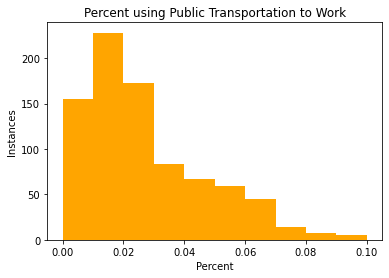

In [17]:
plt.hist(x = 'soc_publictransport', data = df, color= 'orange')
plt.title("Percent using Public Transportation to Work")
plt.xlabel('Percent')
plt.ylabel('Instances')

The average time it takes for people to travel to work:

Text(0, 0.5, 'Instances')

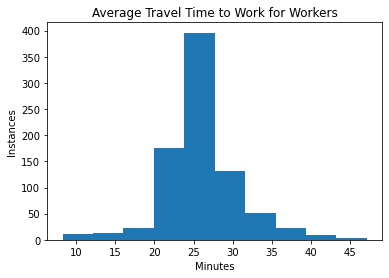

In [18]:
plt.hist(x = 'soc_avgtraveltime', data = df)
plt.title("Average Travel Time to Work for Workers")
plt.xlabel('Minutes')
plt.ylabel('Instances')

The percentage of people who travel more than an hour to work:

Text(0, 0.5, 'Instances')

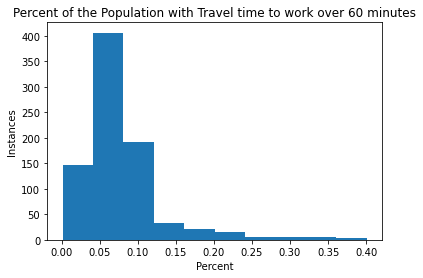

In [19]:
plt.hist(x = 'soc_travel60minplus', data = df)
plt.title("Percent of the Population with Travel time to work over 60 minutes")
plt.xlabel('Percent')
plt.ylabel('Instances')

Life expectancy:

Text(0, 0.5, 'Instances')

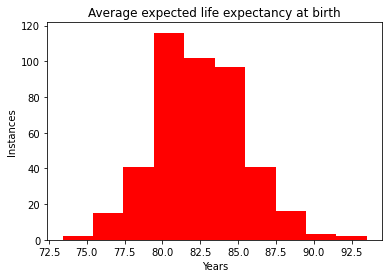

In [20]:
plt.hist(x = 'hlth_life_expectancy', data = df, color= 'red')
plt.title("Average expected life expectancy at birth")
plt.xlabel('Years')
plt.ylabel('Instances')

In [21]:
df_pre_2017.describe()

,data_year,soc_publictransport,soc_avgtraveltime,soc_travel60minplus,hlth_life_expectancy
count,560.000000,560.000000,560.000000,560.000000,279.000000
mean,2012.500000,0.027189,25.505714,0.075302,82.396057
std,2.293336,0.020471,4.792515,0.057106,2.765009
min,2009.000000,0.000000,8.300000,0.001000,73.400000
25%,2010.750000,0.012000,23.300000,0.045000,80.500000
50%,2012.500000,0.022000,25.500000,0.061000,82.000000
75%,2014.250000,0.039000,27.200000,0.084000,84.150000
max,2016.000000,0.092000,42.600000,0.401000,93.500000


Text(0, 0.5, 'Instances')

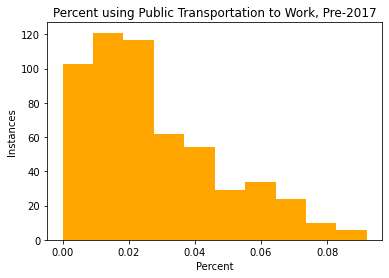

In [22]:
plt.hist(x = 'soc_publictransport', data = df_pre_2017, color= 'orange')
plt.title("Percent using Public Transportation to Work, Pre-2017")
plt.xlabel('Percent')
plt.ylabel('Instances')

Text(0, 0.5, 'Instances')

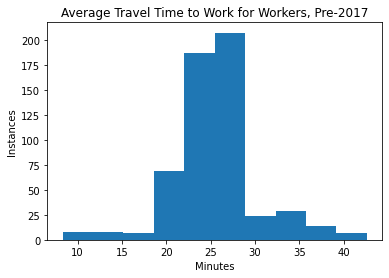

In [23]:
plt.hist(x = 'soc_avgtraveltime', data = df_pre_2017)
plt.title("Average Travel Time to Work for Workers, Pre-2017")
plt.xlabel('Minutes')
plt.ylabel('Instances')

Text(0, 0.5, 'Instances')

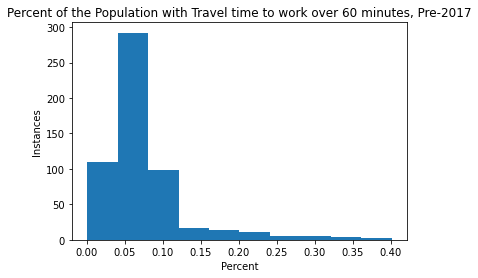

In [24]:
plt.hist(x = 'soc_travel60minplus', data = df_pre_2017)
plt.title("Percent of the Population with Travel time to work over 60 minutes, Pre-2017")
plt.xlabel('Percent')
plt.ylabel('Instances')

In [25]:
df_post_2017.describe()

,data_year,com_community_space,com_community_space2,soc_publictransport,soc_avgtraveltime,soc_travel60minplus,hlth_life_expectancy
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,156.000000
mean,2018.483755,0.550444,0.475560,0.024029,26.899639,0.084209,82.459615
std,1.115076,0.222846,0.198446,0.019085,4.806076,0.051239,3.272757
min,2017.000000,0.014000,0.014000,0.000000,11.200000,0.007000,74.000000
25%,2017.000000,0.434000,0.398000,0.011000,24.600000,0.054000,80.200000
50%,2018.000000,0.566000,0.517000,0.018000,27.100000,0.078000,82.650000
75%,2019.000000,0.740000,0.616000,0.034000,28.300000,0.094000,84.725000
max,2020.000000,0.916000,0.775000,0.100000,47.100000,0.392000,89.500000


Text(0, 0.5, 'Instances')

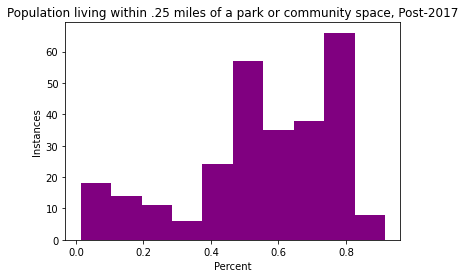

In [26]:
plt.hist(x = 'com_community_space', data = df_post_2017, color = 'purple')
plt.title("Population living within .25 miles of a park or community space, Post-2017")
plt.xlabel('Percent')
plt.ylabel('Instances')

Text(0, 0.5, 'Instances')

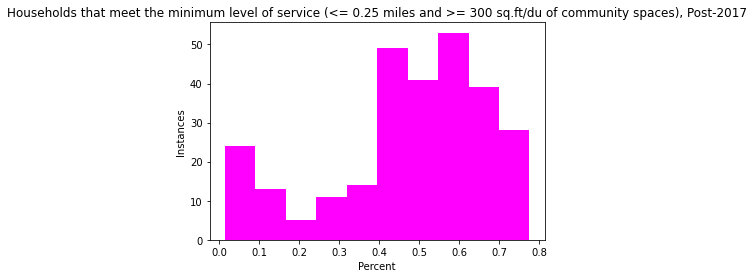

In [27]:
plt.hist(x = 'com_community_space2', data = df_post_2017, color = 'magenta')
plt.title("Households that meet the minimum level of service (<= 0.25 miles and >= 300 sq.ft/du of community spaces), Post-2017")
plt.xlabel('Percent')
plt.ylabel('Instances')

Text(0, 0.5, 'Instances')

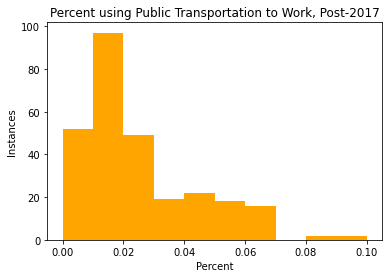

In [28]:
plt.hist(x = 'soc_publictransport', data = df_post_2017, color= 'orange')
plt.title("Percent using Public Transportation to Work, Post-2017")
plt.xlabel('Percent')
plt.ylabel('Instances')

Text(0, 0.5, 'Instances')

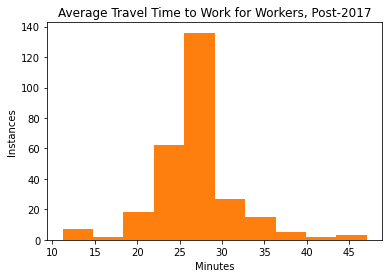

In [29]:
plt.hist(x = 'soc_avgtraveltime', data = df_post_2017)
plt.hist(x = 'soc_avgtraveltime', data = df_post_2017)
plt.title("Average Travel Time to Work for Workers, Post-2017")
plt.xlabel('Minutes')
plt.ylabel('Instances')

Text(0, 0.5, 'Instances')

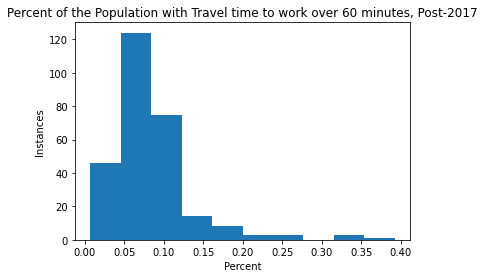

In [30]:
plt.hist(x = 'soc_travel60minplus', data = df_post_2017)
plt.title("Percent of the Population with Travel time to work over 60 minutes, Post-2017")
plt.xlabel('Percent')
plt.ylabel('Instances')

#### Bivariate Analysis

Text(0, 0.5, 'Avg Travel Time')

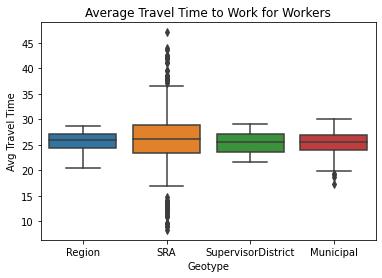

In [31]:
sns.boxplot(x='geotype', y='soc_avgtraveltime', data = df)
plt.title("Average Travel Time to Work for Workers")
plt.xlabel('Geotype')
plt.ylabel('Avg Travel Time')

Text(0, 0.5, 'Percent')

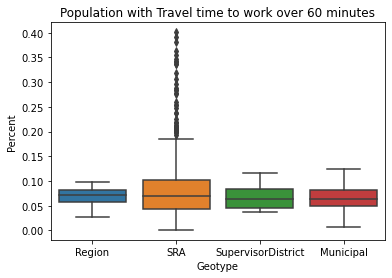

In [32]:
sns.boxplot(x='geotype', y='soc_travel60minplus', data = df)
plt.title("Population with Travel time to work over 60 minutes")
plt.xlabel('Geotype')
plt.ylabel('Percent')

Here we can see that region type does not seem to have much of an effect on mean travel time to work

Text(0, 0.5, 'Percent')

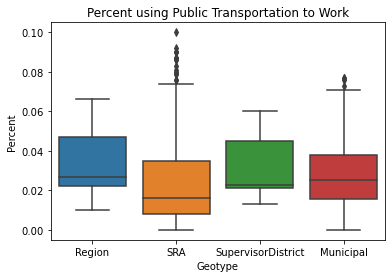

In [33]:
sns.boxplot(x='geotype', y='soc_publictransport', data = df)
plt.title("Percent using Public Transportation to Work")
plt.xlabel('Geotype')
plt.ylabel('Percent')

There does however seem to be a slight difference in public transportation usage by geotype

#### Multivariate Analysis

Using pairplot, from seaborn, plot df for the columns	soc_publictransport	soc_avgtraveltime hlth_life_expectancy. Assign it to a variable called fig.

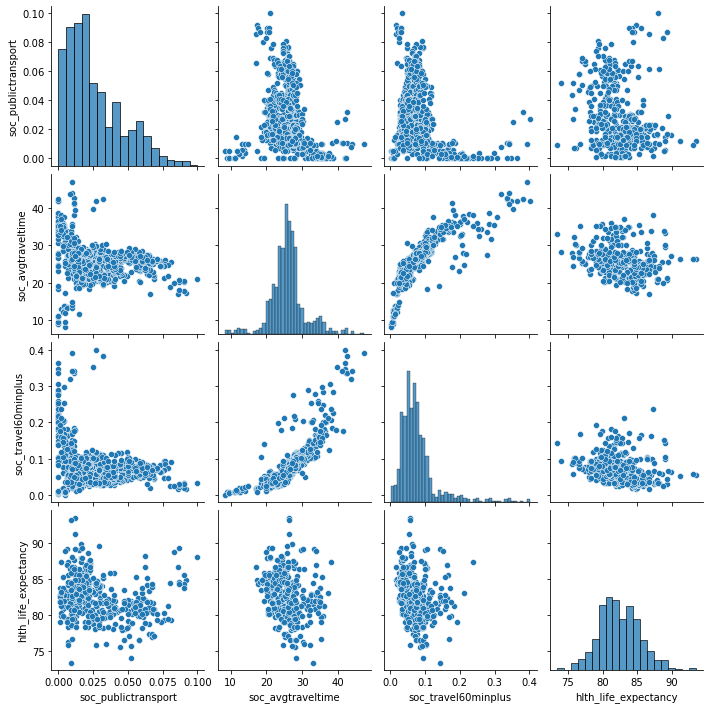

In [34]:
fig = sns.pairplot(df[['soc_publictransport', 'soc_avgtraveltime', 'soc_travel60minplus', 'hlth_life_expectancy']])

/tmp/ipykernel_12467/3031227369.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt = '.2f')


<AxesSubplot:>

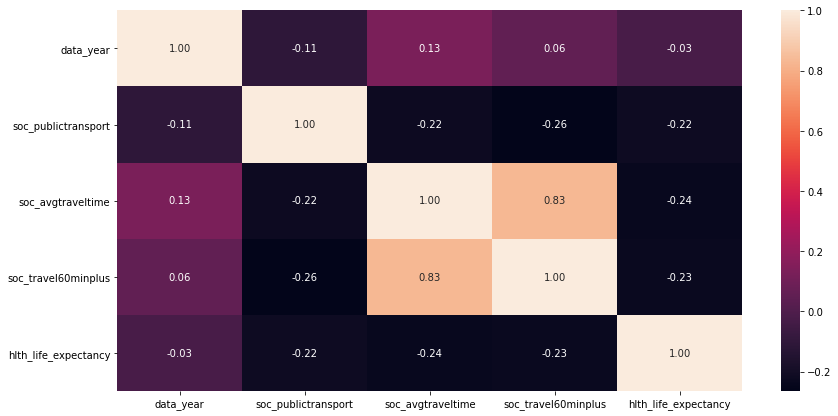

In [35]:
plt.figure(figsize = (14, 7))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

There is nothing all that substantial to note here other than the low negative correlation between life expectancy and average travel time and the low negative correlation between life expectancy and public transportation use

Doing Essentially what we did above but for the Post 2017 df which includes the community space variables

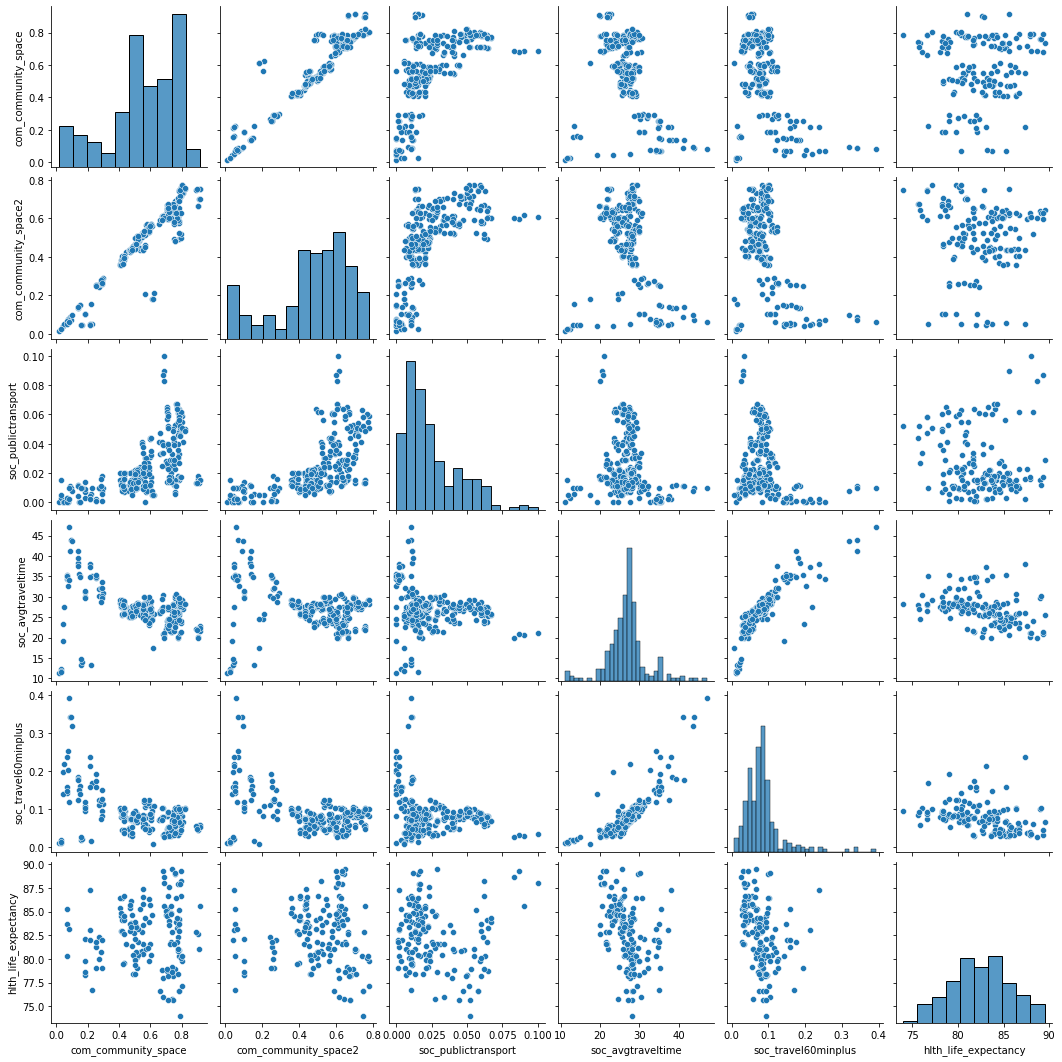

In [36]:
fig = sns.pairplot(df_post_2017[['com_community_space', 'com_community_space2', 'soc_publictransport', 'soc_avgtraveltime', 'soc_travel60minplus', 'hlth_life_expectancy']])

/tmp/ipykernel_12467/4030580210.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_post_2017.corr(), annot = True, fmt = '.2f')


<AxesSubplot:>

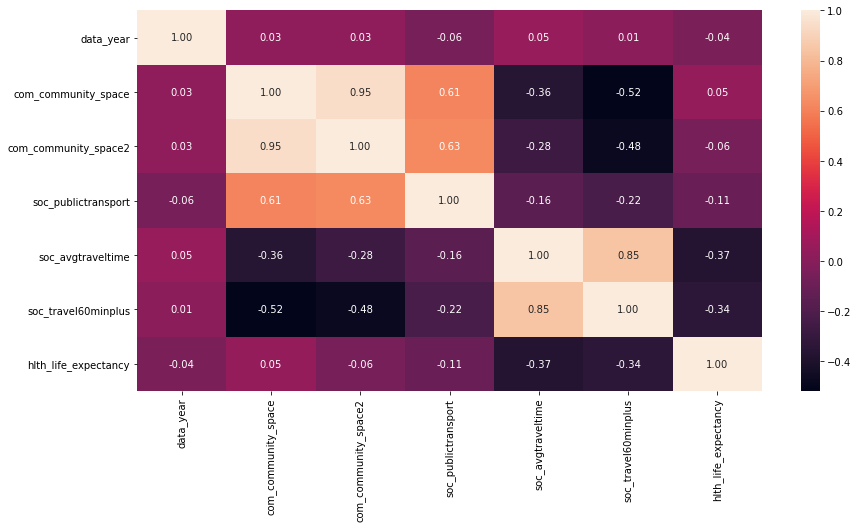

In [37]:
plt.figure(figsize = (14, 7))
sns.heatmap(df_post_2017.corr(), annot = True, fmt = '.2f')

Here we see an interestingly high correlation between community space and public transportation use. We also see higher negative correlations for the variables mentioned previously (life expectancy and public transportation use) which seems to further cement a relationship between them.

### Data Preparation for Model Building

In [38]:
df_post_2017 = df_post_2017.dropna(subset=['hlth_life_expectancy'])
# Separating the target variable and other variables
X = df_post_2017.drop(columns = 'hlth_life_expectancy')
Y = df_post_2017['hlth_life_expectancy']

# Creating dummy variables
X = pd.get_dummies(X, drop_first = True)

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

### Decision Tree

In [39]:
d_tree = DecisionTreeRegressor(random_state=1)
d_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

Train MSE: 0.00
Test MSE: 7.57


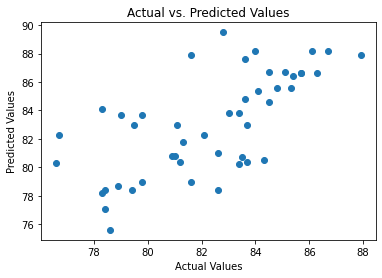

In [40]:
# Make predictions on the train set
y_train_pred = d_tree.predict(X_train)

# Calculate MSE on train set
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {train_mse:.2f}")

# Make predictions on the test set
y_test_pred = d_tree.predict(X_test)

# Calculate MSE on test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.2f}")

# Plotting the predicted values against actual values for the test set
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

We can see here that our model is overfitting as the Test MSE is much higher than the Train MSE. The model perfectly fits the training data but this is a common characteristic of decision trees as they have the ability to memorize the training data to an extent. This model will most likely not generalize well to new and unseen data.

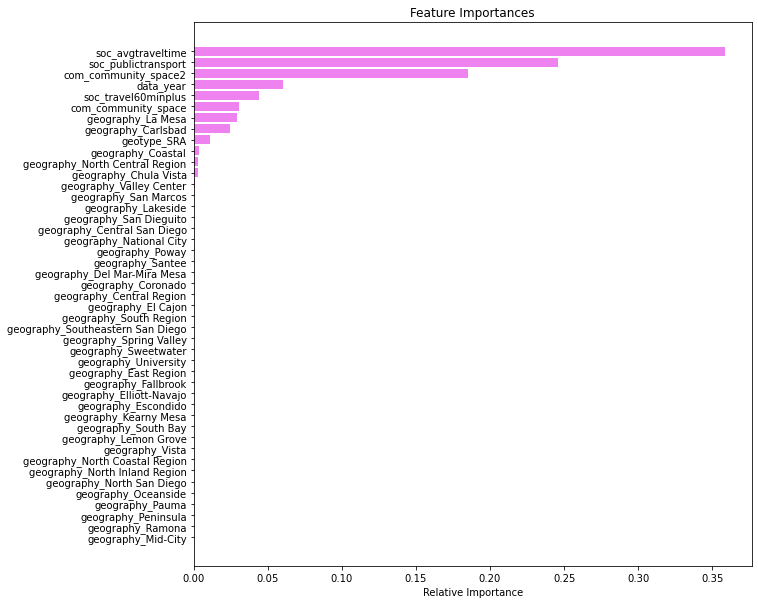

In [41]:
# Plotting the feature importance
features = X.columns.tolist()
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can see that our predictive model of life expectancy is pretty consistent with what we found in our earlier analysis as we see a higher relative importance of average travel time and public transport use as predictors of life expectancy 

### Linear Regression

In [42]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

Train MSE: 2.29
Test MSE: 4.14


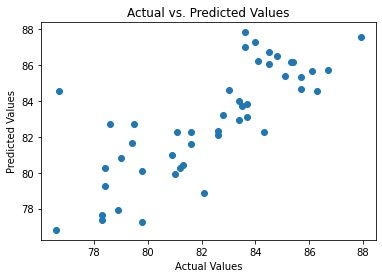

In [43]:
# Make predictions on the train set
y_train_pred = linreg.predict(X_train)

# Calculate MSE on train set
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {train_mse:.2f}")

# Make predictions on the test set
y_test_pred = linreg.predict(X_test)

# Calculate MSE on test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.2f}")

# Plotting the predicted values against actual values for the test set
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

Both MSE values are relatively low, which would suggest that out linear regression model is performing reasonably well on both the training and test datasets, this model seems to be more balanced thus indicating better generalization ability.

data_year: 0.21455560983808944
com_community_space: 4.626658876159229
com_community_space2: 11.611697347290104
soc_publictransport: 217.39089776585828
soc_avgtraveltime: -0.14041221622914699
soc_travel60minplus: 32.61965325189355
geography_Carlsbad: 1.5369341626087316
geography_Central Region: -8.344503468943197
geography_Central San Diego: -10.608518633578857
geography_Chula Vista: -21.853914067560545
geography_Coastal: -1.6807604443322959
geography_Coronado: -6.330117526037042
geography_Del Mar-Mira Mesa: -1.4210854715202004e-13
geography_East Region: -0.7340452622507054
geography_El Cajon: -8.425020412536638
geography_Elliott-Navajo: -0.14182358594293035
geography_Escondido: -5.416088740251125
geography_Fallbrook: 0.17213882243511808
geography_Kearny Mesa: -7.909469371411158
geography_La Mesa: -8.434957077373458
geography_Lakeside: -0.44124257188013244
geography_Lemon Grove: -15.374391634469264
geography_Mid-City: -15.231265475544411
geography_National City: -20.401051720614944
geog

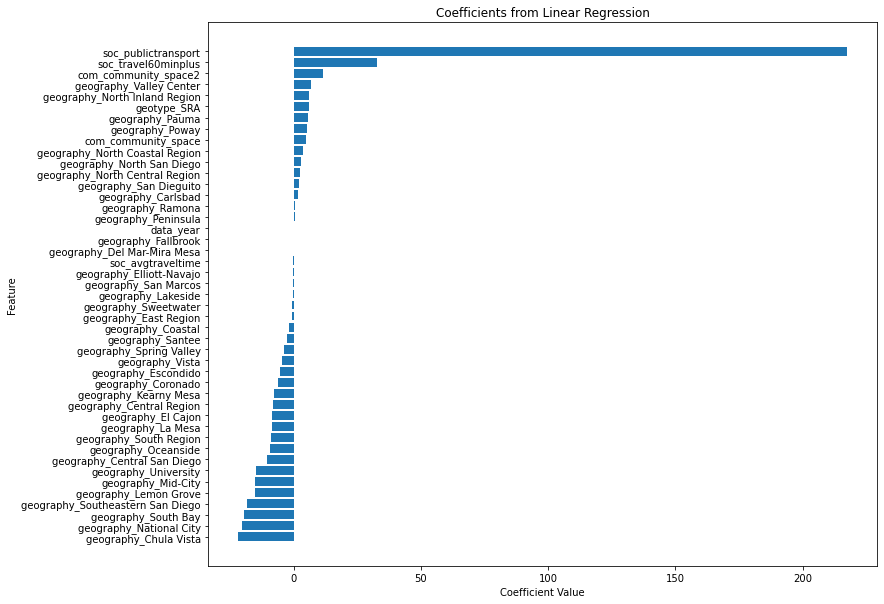

In [44]:
coef = linreg.coef_
features = X.columns.tolist()

for i in range(len(features)):
    print(f'{features[i]}: {coef[i]}')

coef_sorted, features_sorted = zip(*sorted(zip(coef, features), reverse=True))

plt.figure(figsize=(12, 10))
plt.barh(features_sorted, coef_sorted)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients from Linear Regression')
plt.gca().invert_yaxis()
plt.show()

Here we can see that soc_publictransport is high and positive indicating that an increase in public transportation use tends to increase the probability of higher life expectancies. We can see a similar relationship average travel time to work (above 60 minutes) and access to community space also increasing the probability of higher life expectancies in a population. We can also note that living in Chula Vista, National City, South Bay, and Southeastern San Diego tends to decrease the probability of high life expectancy. 

It is worth noting that the relationship we find here between public transportation use and life expectancy directly goes against what we found earlier when we looked at correlations. Although correlation and the coefficients in a linear regression model measure different aspects of the relationship between variables this discretion could be due to a confounding variable. We may be having an issue with omitted variable bias here.